# Compare Gene Dynamics and Ecosystem Dynamics

This notebook may take half an hour or so to run, but it shows all the results using foldable jupyter notebook widgets.

In [1]:
# to suppress warning from ete3 because it's not up to date with py3.12
import warnings
warnings.filterwarnings("ignore", category=SyntaxWarning)

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import ete3
import sys

from plotly.offline import plot
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import plotly.io as pio
pio.renderers.default = 'notebook'

# in ../code we have compare_gene_ecosystem_dynamics.py which contains all the functions we need
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'code'))
import compare_gene_ecosystem_dynamics as cged # this is from the code directory

# # set matplotlib params for the whole cell
# # xlabel and ylabel sizes should be 20
# # tick label sizes should be 16
# # legend label size should be 18

# # make dictionary of these params and then update rcParams
# rcParams_dict = {'font.size': 20,
#                  'xtick.labelsize': 16,
#                  'ytick.labelsize': 16,
#                  'legend.fontsize': 18}
# plt.rcParams.update(rcParams_dict)

import matplotlib as mpl

plt_style_file = "lib/plot.mplstyle"
plt.style.use(plt_style_file)
mpl.rc_file(plt_style_file)
# Scale the relevant rcParams by 2x
scale_factor = 2
for key in mpl.rcParams:
    try:
        if not "size" in key:
            continue
        if isinstance(mpl.rcParams[key], (int, float)) and not isinstance(
            mpl.rcParams[key], bool
        ):
            mpl.rcParams[key] *= scale_factor
        elif isinstance(mpl.rcParams[key], (list, tuple)):
            mpl.rcParams[key] = [
                (
                    v * scale_factor
                    if isinstance(v, (int, float)) and not isinstance(v, bool)
                    else v
                )
                for v in mpl.rcParams[key]
            ]
    except Exception as e:
        print(f"Error scaling {key} from {mpl.rcParams[key]}: {e}")
        raise e

# update rcparams
# legend box with white background and frame
mpl.rcParams["legend.facecolor"] = "white"
mpl.rcParams["legend.frameon"] = True
mpl.rcParams["legend.edgecolor"] = "black"

In [3]:
data_dir = os.path.join(os.path.dirname(os.getcwd()), 'data')
compiled_results_dir = os.path.join(data_dir, 'compiled_results')

plots_dir = os.path.join(data_dir, 'plots', 'all')
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)
stats_dir = os.path.join(data_dir, 'stats', 'all')
if not os.path.exists(stats_dir):
    os.makedirs(stats_dir)

genome_tree_labeled_filepath = os.path.join(data_dir, 'genome_tree/genome_tree.iqtree.treefile.rooted.labeled')


In [4]:
g = ['compiled_dynamics.branchwise.gene.ml.gloome.tsv','compiled_dynamics.branchwise.gene.mp.gloome.tsv', 
    'compiled_dynamics.branchwise.gene.count.tsv', 'compiled_transfers.branchwise.gene.ale.tsv']
gene_dynamics_filepaths = [os.path.join(compiled_results_dir, f) for f in g]
e = 'compiled_dynamics.branchwise.ecotype.mp.gloome.tsv'
env_dynamics_filepath = os.path.join(compiled_results_dir, e)

for gd in gene_dynamics_filepaths:
    # gd_method is everything between 'gene.' and '.tsv'
    gd_method = gd.split('gene.')[1].split('.tsv')[0]
    # similarly for ed_method
    ed_method = e.split('ecotype.')[1].split('.tsv')[0]
    for terminal_or_internal in ['terminal', 'internal', 'all']:
        print('\n-------------------------------------------------------------------------------------\n')
        print(f'\033[1m\033[30mAnalyzing gene dynamics file for \033[1;34m{
            gd_method.upper()}\033[1;30m and env dynamics file for \033[1;34m{
                ed_method.upper()}\033[1;30m for \033[1;34m{terminal_or_internal.upper()}\033[1;30m branches\033[0m')
        cged.plot_gene_env_comparison(gene_dynamics_filepath=gd,
                                env_dynamics_filepath=env_dynamics_filepath,
                                input_tree_filepath=genome_tree_labeled_filepath,
                                output_dir=stats_dir, plots_dir=plots_dir, terminal_or_internal=terminal_or_internal)


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for ML.GLOOME and env dynamics file for MP.GLOOME for TERMINAL branches
Skipping Spearman correlation for Ecosystem Losses and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Corrected Gene Losses and Corrected Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Ecosystem Losses since one the variables has a constant value.


Skipping Nonzero Ecosystem Losses branch set for Transfers due to empty set.
Skipping Nonzero Ecosystem Losses branch set for Losses due to empty set.


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for ML.GLOOME and env dynamics file for MP.GLOOME for INTERNAL branches
Skipping Spearman correlation for Ecosystem Losses and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Corrected Gene Losses and Corrected Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Ecosystem Losses since one the variables has a constant value.


Skipping Nonzero Ecosystem Losses branch set for Transfers due to empty set.
Skipping Nonzero Ecosystem Losses branch set for Losses due to empty set.


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for ML.GLOOME and env dynamics file for MP.GLOOME for ALL branches
Skipping Spearman correlation for Ecosystem Losses and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Corrected Gene Losses and Corrected Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Ecosystem Losses since one the variables has a constant value.


Skipping Nonzero Ecosystem Losses branch set for Transfers due to empty set.
Skipping Nonzero Ecosystem Losses branch set for Losses due to empty set.


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for MP.GLOOME and env dynamics file for MP.GLOOME for TERMINAL branches
Skipping Spearman correlation for Ecosystem Losses and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Corrected Gene Losses and Corrected Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Ecosystem Losses since one the variables has a constant value.


Skipping Nonzero Ecosystem Losses branch set for Transfers due to empty set.
Skipping Nonzero Ecosystem Losses branch set for Losses due to empty set.


Skipping randomized mean difference for Gene Losses due to constant value.
Skipping randomized mean difference for Gene Losses/Branch Length due to constant value.


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for MP.GLOOME and env dynamics file for MP.GLOOME for INTERNAL branches
Skipping Spearman correlation for Ecosystem Losses and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Corrected Gene Losses and Corrected Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Ecosystem Losses since one the variables has a constant value.


Skipping Nonzero Ecosystem Losses branch set for Transfers due to empty set.
Skipping Nonzero Ecosystem Losses branch set for Losses due to empty set.


Skipping randomized mean difference for Gene Losses due to constant value.
Skipping randomized mean difference for Gene Losses/Branch Length due to constant value.


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for MP.GLOOME and env dynamics file for MP.GLOOME for ALL branches
Skipping Spearman correlation for Ecosystem Losses and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Corrected Gene Losses and Corrected Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Ecosystem Losses since one the variables has a constant value.


Skipping Nonzero Ecosystem Losses branch set for Transfers due to empty set.
Skipping Nonzero Ecosystem Losses branch set for Losses due to empty set.


Skipping randomized mean difference for Gene Losses due to constant value.
Skipping randomized mean difference for Gene Losses/Branch Length due to constant value.


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for COUNT and env dynamics file for MP.GLOOME for TERMINAL branches
Skipping Spearman correlation for Ecosystem Losses and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Corrected Gene Losses and Corrected Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Ecosystem Losses since one the variables has a constant value.


Skipping Nonzero Ecosystem Losses branch set for Transfers due to empty set.
Skipping Nonzero Ecosystem Losses branch set for Losses due to empty set.


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for COUNT and env dynamics file for MP.GLOOME for INTERNAL branches
Skipping Spearman correlation for Ecosystem Losses and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Corrected Gene Losses and Corrected Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Ecosystem Losses since one the variables has a constant value.


Skipping Nonzero Ecosystem Losses branch set for Transfers due to empty set.
Skipping Nonzero Ecosystem Losses branch set for Losses due to empty set.


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for COUNT and env dynamics file for MP.GLOOME for ALL branches
Skipping Spearman correlation for Ecosystem Losses and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Corrected Gene Losses and Corrected Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Ecosystem Losses since one the variables has a constant value.


Skipping Nonzero Ecosystem Losses branch set for Transfers due to empty set.
Skipping Nonzero Ecosystem Losses branch set for Losses due to empty set.


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for ALE and env dynamics file for MP.GLOOME for TERMINAL branches


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for ALE and env dynamics file for MP.GLOOME for INTERNAL branches


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for ALE and env dynamics file for MP.GLOOME for ALL branches


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…

In [5]:
g = ['compiled_dynamics.branchwise.gene.ml.gloome.tsv', 'compiled_dynamics.branchwise.gene.mp.gloome.tsv',
     'compiled_dynamics.branchwise.gene.count.tsv', 'compiled_transfers.branchwise.gene.ale.tsv' ]
gene_dynamics_filepaths = [os.path.join(compiled_results_dir, f) for f in g]
e = 'compiled_dynamics.branchwise.ecotype.count.tsv'
env_dynamics_filepath = os.path.join(compiled_results_dir, e)

for gd in gene_dynamics_filepaths:
    # gd_method is everything between 'gene.' and '.tsv'
    gd_method = gd.split('gene.')[1].split('.tsv')[0]
    # similarly for ed_method
    ed_method = e.split('ecotype.')[1].split('.tsv')[0]
    for terminal_or_internal in ['terminal', 'internal', 'all']:
        print('\n-------------------------------------------------------------------------------------\n')
        print(f'\033[1m\033[30mAnalyzing gene dynamics file for \033[1;34m{
            gd_method.upper()}\033[1;30m and env dynamics file for \033[1;34m{
                ed_method.upper()}\033[1;30m for \033[1;34m{terminal_or_internal.upper()}\033[1;30m branches\033[0m')
        cged.plot_gene_env_comparison(gene_dynamics_filepath=gd,
                                      env_dynamics_filepath=env_dynamics_filepath,
                                      input_tree_filepath=genome_tree_labeled_filepath,
                                      output_dir=stats_dir, plots_dir=plots_dir, terminal_or_internal=terminal_or_internal)


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for ML.GLOOME and env dynamics file for COUNT for TERMINAL branches


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for ML.GLOOME and env dynamics file for COUNT for INTERNAL branches


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for ML.GLOOME and env dynamics file for COUNT for ALL branches


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for MP.GLOOME and env dynamics file for COUNT for TERMINAL branches
Skipping Spearman correlation for Ecosystem Losses and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Corrected Gene Losses and Corrected Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Gene Losses since one the variables has a constant value.


Skipping randomized mean difference for Gene Losses due to constant value.
Skipping randomized mean difference for Gene Losses/Branch Length due to constant value.


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for MP.GLOOME and env dynamics file for COUNT for INTERNAL branches
Skipping Spearman correlation for Ecosystem Losses and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Corrected Gene Losses and Corrected Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Gene Losses since one the variables has a constant value.


Skipping randomized mean difference for Gene Losses due to constant value.
Skipping randomized mean difference for Gene Losses/Branch Length due to constant value.


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for MP.GLOOME and env dynamics file for COUNT for ALL branches
Skipping Spearman correlation for Ecosystem Losses and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Corrected Gene Losses and Corrected Ecosystem Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Gene Losses since one the variables has a constant value.
Skipping Spearman correlation for Branch Length and Corrected Gene Losses since one the variables has a constant value.


Skipping randomized mean difference for Gene Losses due to constant value.
Skipping randomized mean difference for Gene Losses/Branch Length due to constant value.


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for COUNT and env dynamics file for COUNT for TERMINAL branches


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for COUNT and env dynamics file for COUNT for INTERNAL branches


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for COUNT and env dynamics file for COUNT for ALL branches


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for ALE and env dynamics file for COUNT for TERMINAL branches


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for ALE and env dynamics file for COUNT for INTERNAL branches


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…


-------------------------------------------------------------------------------------

Analyzing gene dynamics file for ALE and env dynamics file for COUNT for ALL branches


Accordion(children=(Output(), Output(), Output(), Output(), Output()), titles=('Dataframe', 'Spearman Correlat…

Accordion(children=(Output(), Output(), Output()), titles=('Plot:Gene and Environment Dynamics Comparison', 'P…

# Combine analyses across all combinations

In [4]:
# read in TSVs of spearman results
spearman_results_filepaths = [os.path.join(stats_dir, f) for f in os.listdir(stats_dir) if f.startswith('spearman_correlations')]
spearman_results_dfs = {f:pd.read_csv(f, sep='\t') for f in spearman_results_filepaths}

# for each df, add a column with the methods used
for i, df in spearman_results_dfs.items():
    spearman_results_file_basename = os.path.basename(i)
    gene_method = ' '.join(spearman_results_file_basename.split('-')[2].split('.')[1:])
    env_method = ' '.join(spearman_results_file_basename.split('-')[3].split('.')[1:-1])
    df['HGT inference method'] = gene_method
    df['Ecosystem transfer inference method'] = env_method

combined_spearman_results_df = pd.concat(spearman_results_dfs.values(), ignore_index=True)
# sort by terminal or internal, then env_method, then gene_method
combined_spearman_results_df = combined_spearman_results_df.sort_values(
    by=['Terminal or Internal', 'Ecosystem transfer inference method', 'HGT inference method'])

display(combined_spearman_results_df)
combined_spearman_results_df.to_csv(os.path.join(
    stats_dir, 'spearman_rho_results.across_methods.tsv'), sep='\t', index=False)

# similarly for mwu results
mwu_results_filepaths = [os.path.join(stats_dir, f) for f in os.listdir(stats_dir) if f.startswith('mwu-')]
mwu_results_dfs = {f:pd.read_csv(f, sep='\t') for f in mwu_results_filepaths}

# for each df, add a column with the methods used
for i, df in mwu_results_dfs.items():
    mwu_results_file_basename = os.path.basename(i)
    gene_method = ' '.join(mwu_results_file_basename.split('-')[2].split('.')[1:])
    env_method = ' '.join(mwu_results_file_basename.split('-')[3].split('.')[1:-1])
    df['HGT inference method'] = gene_method
    df['Ecosystem transfer inference method'] = env_method

    # keep only Variable == 'Gene Transfers/Branch Length'
    mwu_results_dfs[i] = df[df["Variable"] == "Gene Transfers/Branch Length"]
    
combined_mwu_results_df = pd.concat(mwu_results_dfs.values(), ignore_index=True)
# sort by terminal or internal, then env_method, then gene_method
combined_mwu_results_df = combined_mwu_results_df.sort_values(
    by=['Terminal or Internal', 'Ecosystem transfer inference method', 'HGT inference method'])

display(combined_mwu_results_df)
combined_mwu_results_df.to_csv(os.path.join(
    stats_dir, 'mwu_results.across_methods.tsv'), sep='\t', index=False)

,Variable-Pair,Rho,p-value,significant,Terminal or Internal,HGT inference method,Ecosystem transfer inference method
192,"('Ecosystem Transfers', 'Gene Transfers')",0.556575,3.506534e-27,*,all,ale,count
193,"('Corrected Gene Transfers', 'Corrected Ecosys...",-0.121389,3.071642e-02,*,all,ale,count
194,"('Branch Length', 'Gene Transfers')",0.672159,5.087521e-43,*,all,ale,count
195,"('Branch Length', 'Ecosystem Transfers')",0.440595,1.738397e-16,*,all,ale,count
196,"('Branch Length', 'Corrected Gene Transfers')",0.382636,1.712902e-12,*,all,ale,count
...,...,...,...,...,...,...,...
25,"('Corrected Gene Transfers', 'Corrected Ecosys...",0.004335,9.567525e-01,NaN,terminal,mp gloome,mp gloome
26,"('Branch Length', 'Gene Transfers')",0.638437,1.394561e-19,*,terminal,mp gloome,mp gloome
27,"('Branch Length', 'Ecosystem Transfers')",0.059498,4.562837e-01,NaN,terminal,mp gloome,mp gloome
28,"('Branch Length', 'Corrected Gene Transfers')",0.400257,1.718847e-07,*,terminal,mp gloome,mp gloome


,Variable,Mann-Whitney U,p-value,CLES,Mean HGT with Zero Ecosystem Transfers,Mean HGT with Nonzero Ecosystem Transfers,Number of branches with Zero Ecosystem Transfers,Number of branches with Nonzero Ecosystem Transfers,Terminal or Internal,significant,HGT inference method,Ecosystem transfer inference method
23,Gene Transfers/Branch Length,15391.0,6.728865e-08,0.685141,59.576486,37.022510,108,208,all,*,ale,count
20,Gene Transfers/Branch Length,14157.5,1.458212e-04,0.630231,314.919808,128.615150,108,208,all,*,count,count
14,Gene Transfers/Branch Length,14987.0,1.094603e-06,0.667156,602.075785,414.391720,108,208,all,*,ml gloome,count
17,Gene Transfers/Branch Length,14246.0,9.156976e-05,0.634170,1182.449267,804.284974,108,208,all,*,mp gloome,count
11,Gene Transfers/Branch Length,15391.0,6.728865e-08,0.685141,59.576486,37.022510,108,208,all,*,ale,mp gloome
8,Gene Transfers/Branch Length,14157.5,1.458212e-04,0.630231,314.919808,128.615150,108,208,all,*,count,mp gloome
2,Gene Transfers/Branch Length,14987.0,1.094603e-06,0.667156,602.075785,414.391720,108,208,all,*,ml gloome,mp gloome
5,Gene Transfers/Branch Length,14246.0,9.156976e-05,0.634170,1182.449267,804.284974,108,208,all,*,mp gloome,mp gloome
22,Gene Transfers/Branch Length,2839.0,7.499414e-01,0.484802,62.898991,67.816610,96,61,internal,NaN,ale,count
19,Gene Transfers/Branch Length,3188.5,3.485992e-01,0.544484,333.487126,259.773550,96,61,internal,NaN,count,count


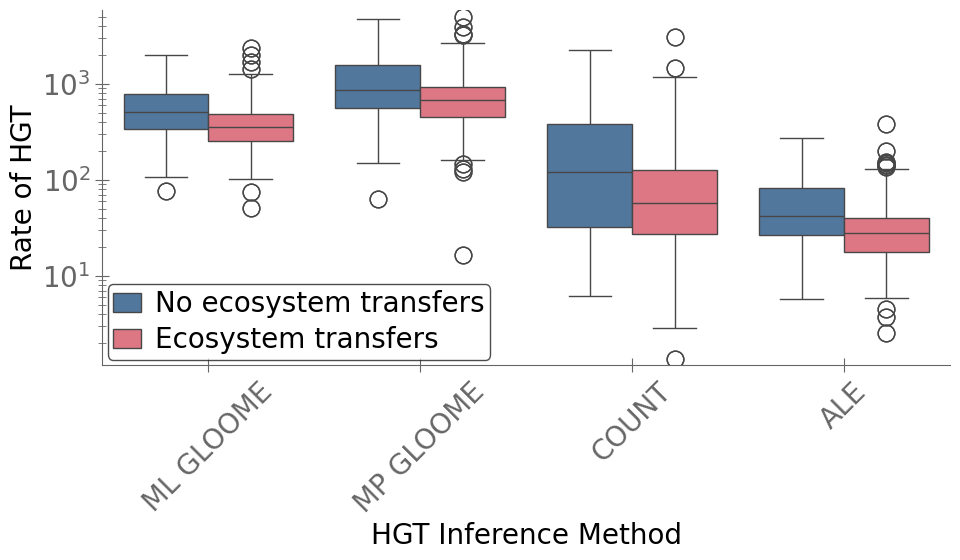

In [5]:
# plot box plots of the gene transfer rates for each gene method and count as env method
combined_dfs_list = [f"{stats_dir}/{fi}" for fi in os.listdir(stats_dir) if fi.startswith('combined_df') and fi.endswith('.count.tsv')]

cged.plot_box_plots_comparing_gene_env(combined_dfs_list, plots_dir)

In [6]:
# print mwu results again, but separate dfs for count and `mp gloome` env methods
# read in TSVs of mwu results across methods
mwu_results_filepath = os.path.join(stats_dir, 'mwu_results.across_methods.tsv')
mwu_results_df = pd.read_csv(mwu_results_filepath, sep='\t')
mwu_results_df = mwu_results_df[mwu_results_df['Terminal or Internal'] == 'all']
# replace 'count' with Count and other methods with Sentence Case
mwu_results_df['Ecosystem transfer inference method'] = mwu_results_df['Ecosystem transfer inference method'].apply(lambda x: x.capitalize() if x == 'count' else x.upper())
mwu_results_df['HGT inference method'] = mwu_results_df['HGT inference method'].apply(lambda x: x.capitalize() if x == 'count' else x.upper())
# keep only relevant columns
mwu_results_df = mwu_results_df[['HGT inference method', 'Ecosystem transfer inference method', 
                                 'Mean HGT with Nonzero Ecosystem Transfers', 'Mean HGT with Zero Ecosystem Transfers',
                                    'Mann-Whitney U', 'p-value', "CLES",
                                    'Number of branches with Nonzero Ecosystem Transfers', 'Number of branches with Zero Ecosystem Transfers']] 

display(mwu_results_df)
# print latex here, with 3 decimal places and p-values in 10^-x format
latex_printout_mwu = mwu_results_df.copy()
# format the p-values as 10^-x
latex_printout_mwu['p-value'] = latex_printout_mwu['p-value'].apply(lambda x: f"\\num{{{x:.2g}}}")
print(latex_printout_mwu.to_latex(index=False, 
                                  float_format="{:0.3f}".format, escape=False))


,HGT inference method,Ecosystem transfer inference method,Mean HGT with Nonzero Ecosystem Transfers,Mean HGT with Zero Ecosystem Transfers,Mann-Whitney U,p-value,CLES,Number of branches with Nonzero Ecosystem Transfers,Number of branches with Zero Ecosystem Transfers
0,ALE,Count,37.022510,59.576486,15391.0,6.728865e-08,0.685141,208,108
1,Count,Count,128.615150,314.919808,14157.5,1.458212e-04,0.630231,208,108
2,ML GLOOME,Count,414.391720,602.075785,14987.0,1.094603e-06,0.667156,208,108
3,MP GLOOME,Count,804.284974,1182.449267,14246.0,9.156976e-05,0.634170,208,108
4,ALE,MP GLOOME,37.022510,59.576486,15391.0,6.728865e-08,0.685141,208,108
5,Count,MP GLOOME,128.615150,314.919808,14157.5,1.458212e-04,0.630231,208,108
6,ML GLOOME,MP GLOOME,414.391720,602.075785,14987.0,1.094603e-06,0.667156,208,108
7,MP GLOOME,MP GLOOME,804.284974,1182.449267,14246.0,9.156976e-05,0.634170,208,108


\begin{tabular}{llrrrlrrr}
\toprule
HGT inference method & Ecosystem transfer inference method & Mean HGT with Nonzero Ecosystem Transfers & Mean HGT with Zero Ecosystem Transfers & Mann-Whitney U & p-value & CLES & Number of branches with Nonzero Ecosystem Transfers & Number of branches with Zero Ecosystem Transfers \\
\midrule
ALE & Count & 37.023 & 59.576 & 15391.000 & \num{6.7e-08} & 0.685 & 208 & 108 \\
Count & Count & 128.615 & 314.920 & 14157.500 & \num{0.00015} & 0.630 & 208 & 108 \\
ML GLOOME & Count & 414.392 & 602.076 & 14987.000 & \num{1.1e-06} & 0.667 & 208 & 108 \\
MP GLOOME & Count & 804.285 & 1182.449 & 14246.000 & \num{9.2e-05} & 0.634 & 208 & 108 \\
ALE & MP GLOOME & 37.023 & 59.576 & 15391.000 & \num{6.7e-08} & 0.685 & 208 & 108 \\
Count & MP GLOOME & 128.615 & 314.920 & 14157.500 & \num{0.00015} & 0.630 & 208 & 108 \\
ML GLOOME & MP GLOOME & 414.392 & 602.076 & 14987.000 & \num{1.1e-06} & 0.667 & 208 & 108 \\
MP GLOOME & MP GLOOME & 804.285 & 1182.449 & 14246.000 & 